In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df=pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [119]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [120]:
df.drop(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'}, inplace= True)

In [121]:
int_cols = df.select_dtypes(include='int64').columns
float_cols = df.select_dtypes(include='float64').columns
cat_cols = df.select_dtypes(include='object').columns

In [122]:
df[float_cols].describe()

,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,8631.953698,7469.139637,0.759941,0.712222,0.274894
std,9088.776650,9090.685324,0.219207,0.238086,0.275691
min,1438.300000,3.000000,0.000000,0.000000,0.000000
25%,2555.000000,1324.500000,0.631000,0.582000,0.023000
50%,4549.000000,3474.000000,0.736000,0.702000,0.176000
75%,11067.500000,9859.000000,0.859000,0.818000,0.503000
max,34516.000000,34516.000000,3.397000,3.714000,0.999000


In [123]:
df[int_cols].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,1162.814061,4404.086304,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,814.987335,3397.129254,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,510.000000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,1784.000000,4741.000000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,2517.000000,18484.000000,139.000000


In [124]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [126]:
df.duplicated().sum()

0

In [127]:
unique_counts = df.nunique().sort_values()


print(unique_counts)

Attrition_Flag                  2
Gender                          2
Marital_Status                  4
Card_Category                   4
Total_Relationship_Count        6
Dependent_count                 6
Income_Category                 6
Education_Level                 7
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Months_on_book                 44
Customer_Age                   45
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Total_Amt_Chng_Q4_Q1         1158
Total_Revolving_Bal          1974
Total_Trans_Amt              5033
Credit_Limit                 6205
Avg_Open_To_Buy              6813
CLIENTNUM                   10127
dtype: int64


In [128]:
for col in int_cols:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Column '{col}' has {unique_count} unique values:")
    print(unique_values)

Column 'CLIENTNUM' has 10127 unique values:
[768805383 818770008 713982108 ... 716506083 717406983 714337233]
Column 'Customer_Age' has 45 unique values:
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Column 'Dependent_count' has 6 unique values:
[3 5 4 2 0 1]
Column 'Months_on_book' has 44 unique values:
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Column 'Total_Relationship_Count' has 6 unique values:
[5 6 4 3 2 1]
Column 'Months_Inactive_12_mon' has 7 unique values:
[1 4 2 3 6 0 5]
Column 'Contacts_Count_12_mon' has 7 unique values:
[3 2 0 1 4 5 6]
Column 'Total_Revolving_Bal' has 1974 unique values:
[ 777  864    0 ...  534  476 2241]
Column 'Total_Trans_Amt' has 5033 unique values:
[ 1144  1291  1887 ... 10291  8395 10294]
Column 'Total_Trans_Ct' has 126 unique values:
[ 42  33  20  28  24  31  36  32  

In [129]:
for col in cat_cols:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Column '{col}' has {unique_count} unique values:")
    print(unique_values)

Column 'Attrition_Flag' has 2 unique values:
['Existing Customer' 'Attrited Customer']
Column 'Gender' has 2 unique values:
['M' 'F']
Column 'Education_Level' has 7 unique values:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Column 'Marital_Status' has 4 unique values:
['Married' 'Single' 'Unknown' 'Divorced']
Column 'Income_Category' has 6 unique values:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Column 'Card_Category' has 4 unique values:
['Blue' 'Gold' 'Silver' 'Platinum']


In [130]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

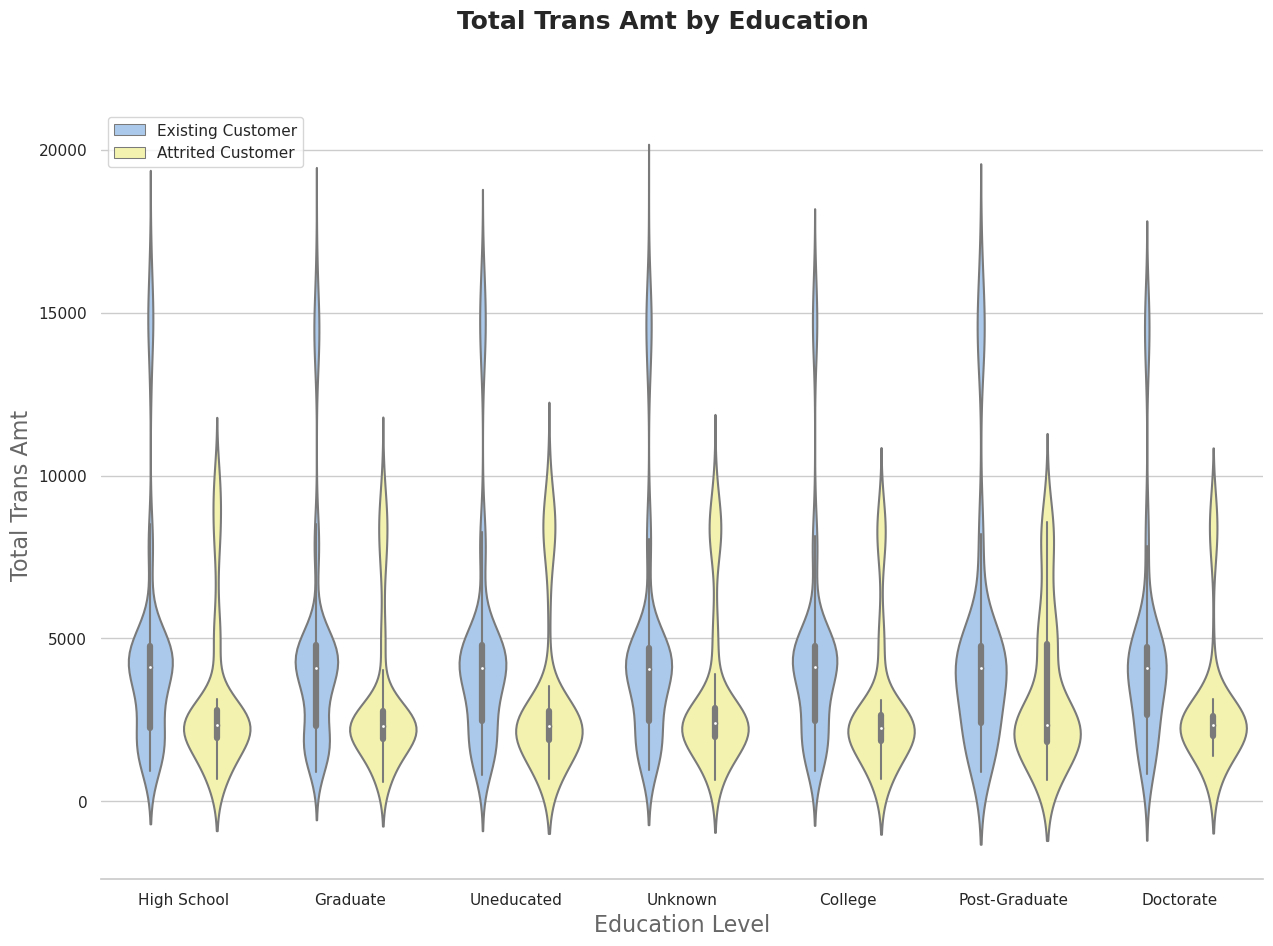

In [135]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(x="Education_Level", y="Total_Trans_Amt", hue="Attrition_Flag", data=df,
               palette={"Existing Customer": "b", "Attrited Customer": "y"})
sns.despine(left=True)

f.suptitle('Total Trans Amt by Education', fontsize=18, fontweight='bold')
ax.set_xlabel("Education Level",size = 16,alpha=0.7)
ax.set_ylabel("Total Trans Amt",size = 16,alpha=0.7)
plt.legend(loc='upper left')

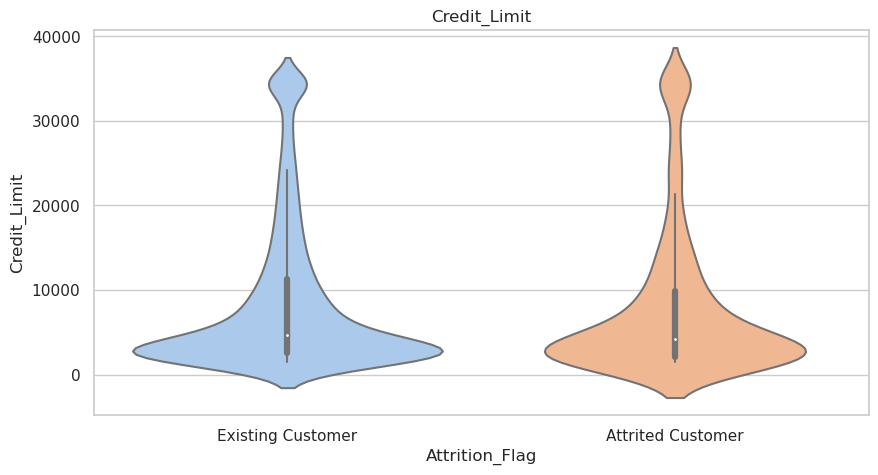

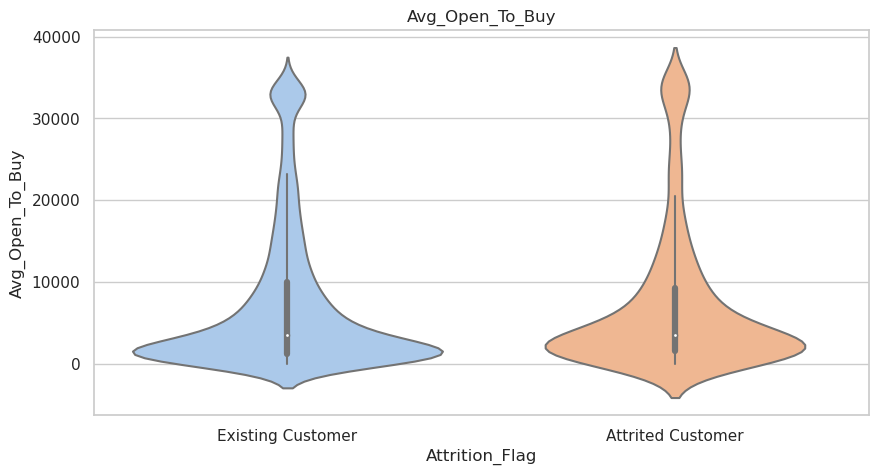

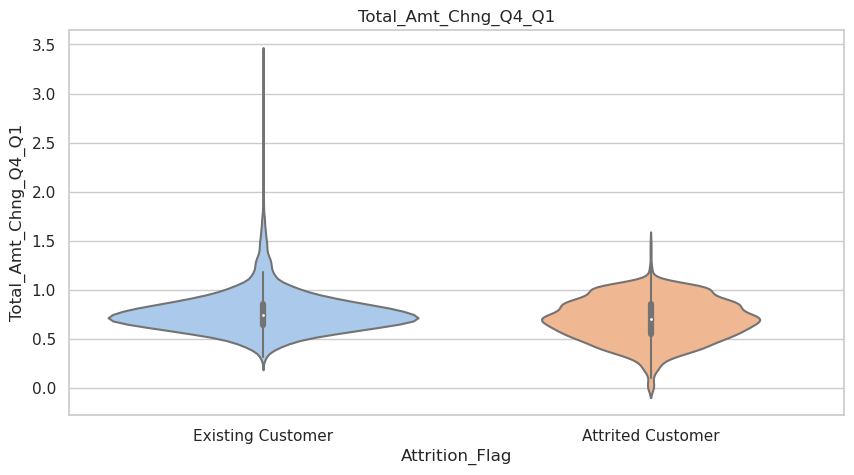

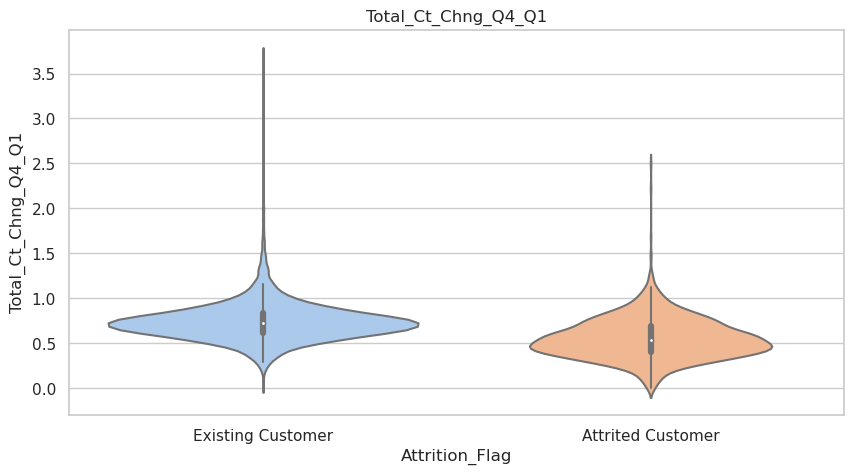

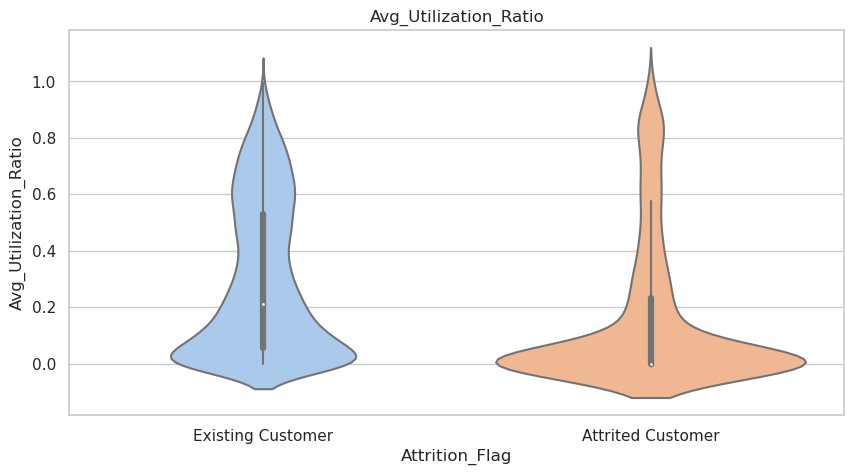

In [136]:

for i in float_cols:
    sns.set(style="whitegrid", palette="pastel", color_codes=True)
    sns.violinplot(x='Attrition_Flag', y=i, data=df)
    plt.title(i)
    plt.show()

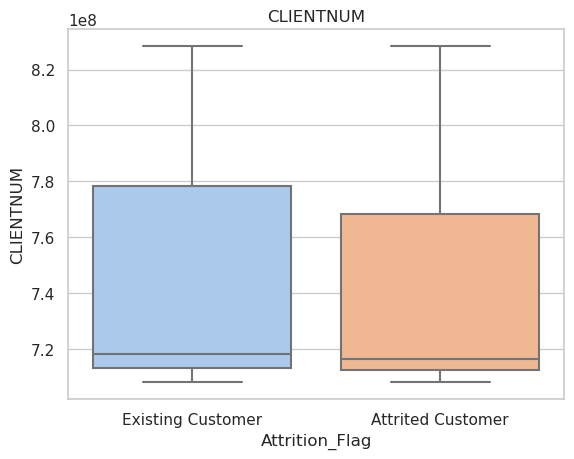

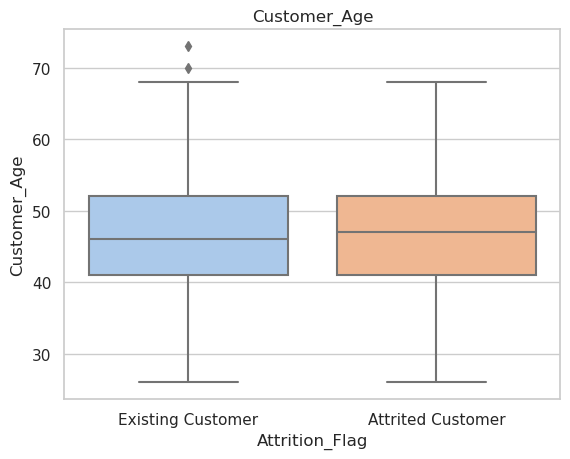

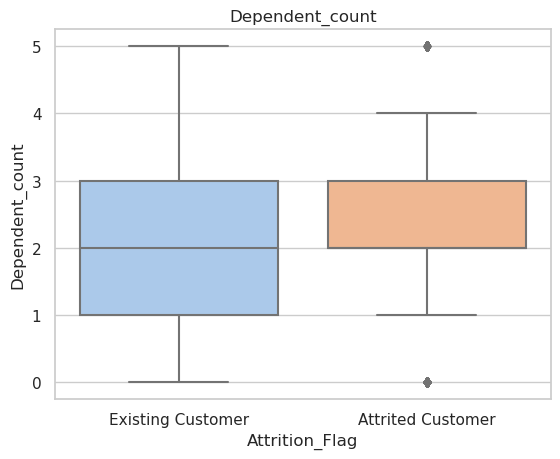

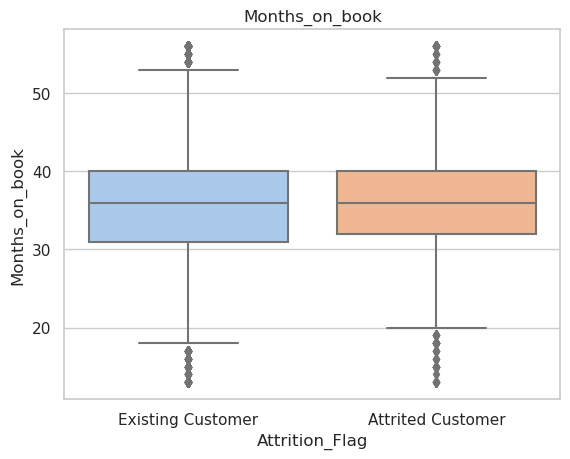

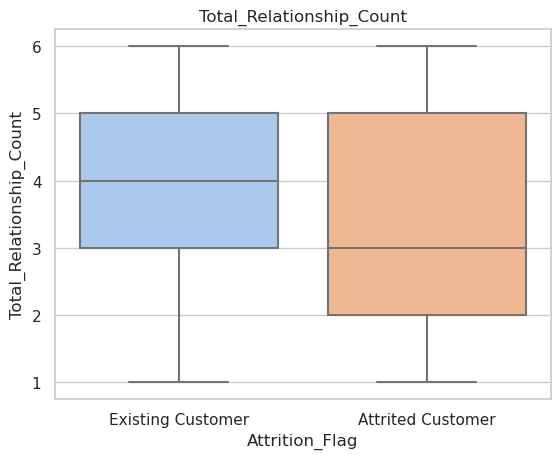

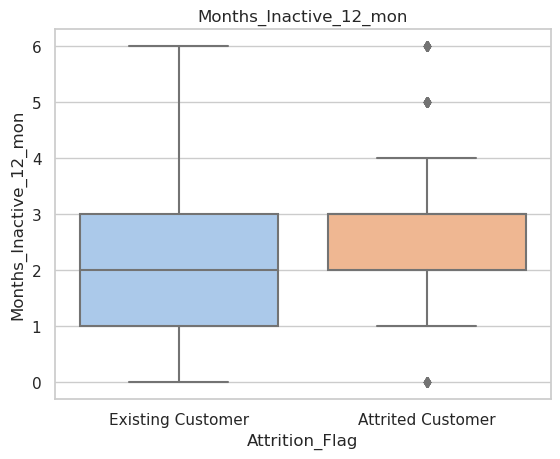

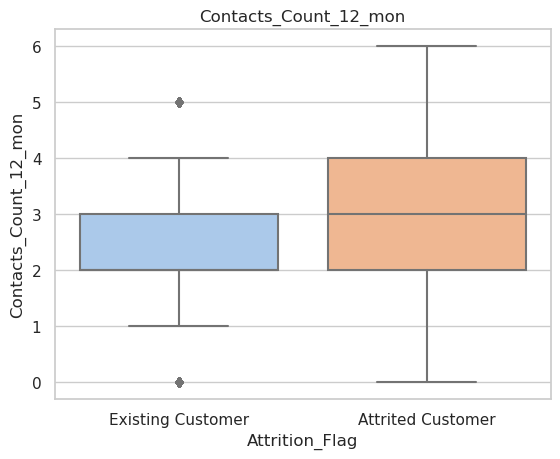

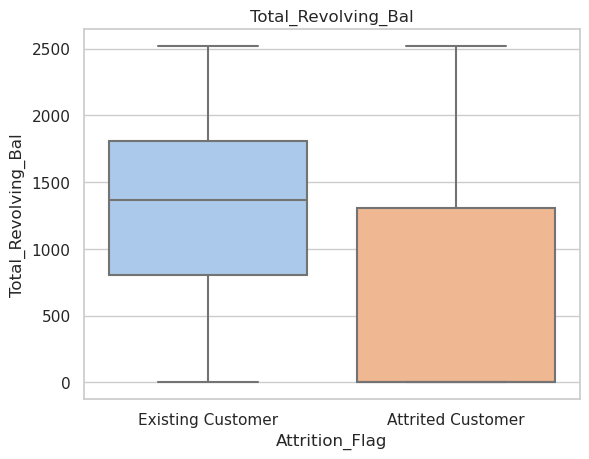

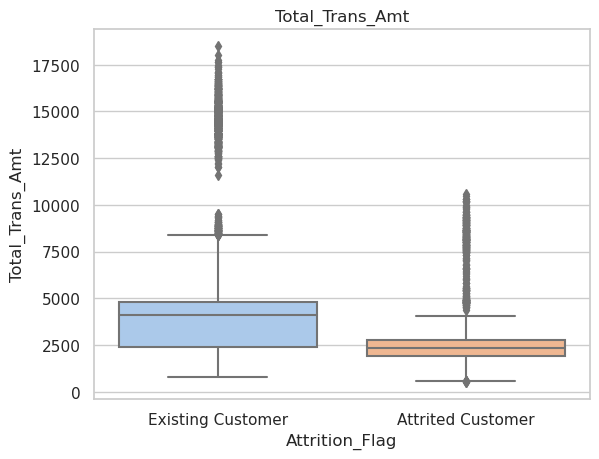

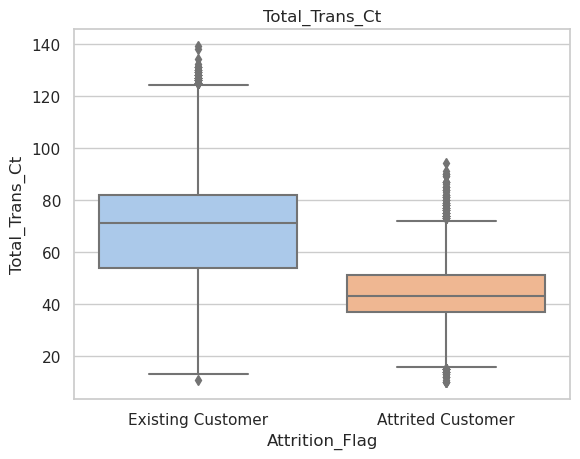

In [35]:
for i in int_cols:
    sns.boxplot(x='Attrition_Flag', y=i, data=df)
    plt.title(i)
    plt.show()

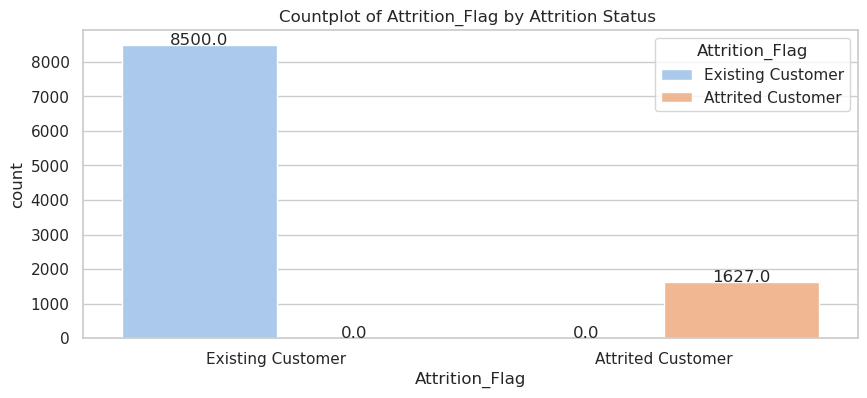

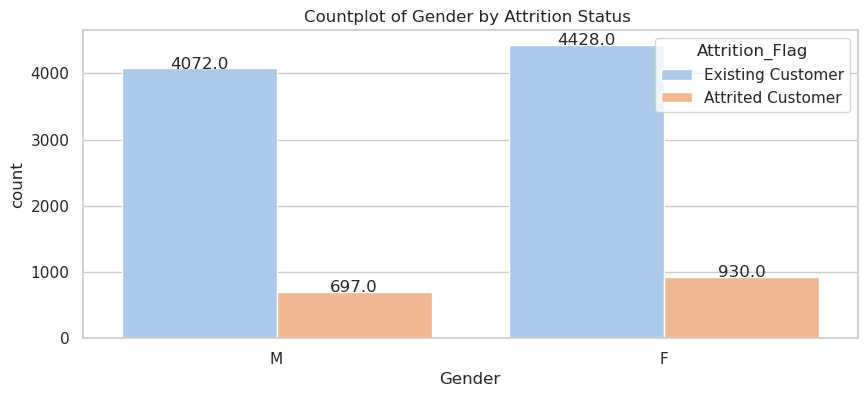

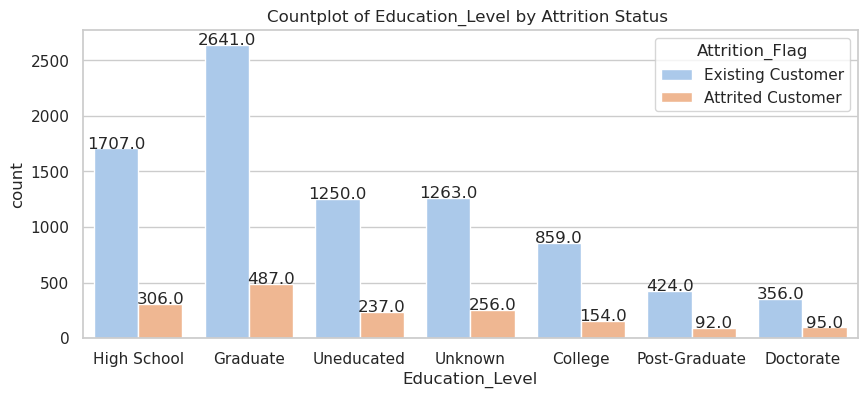

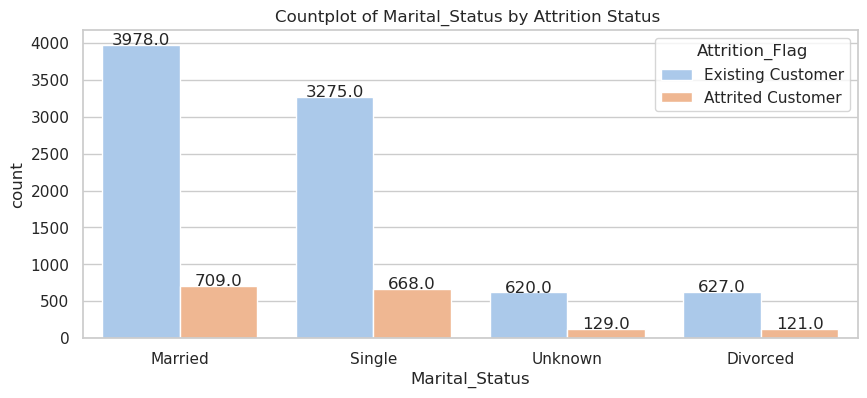

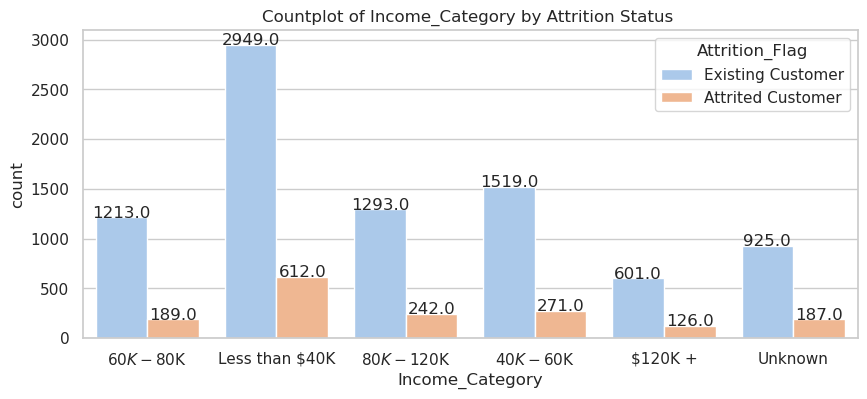

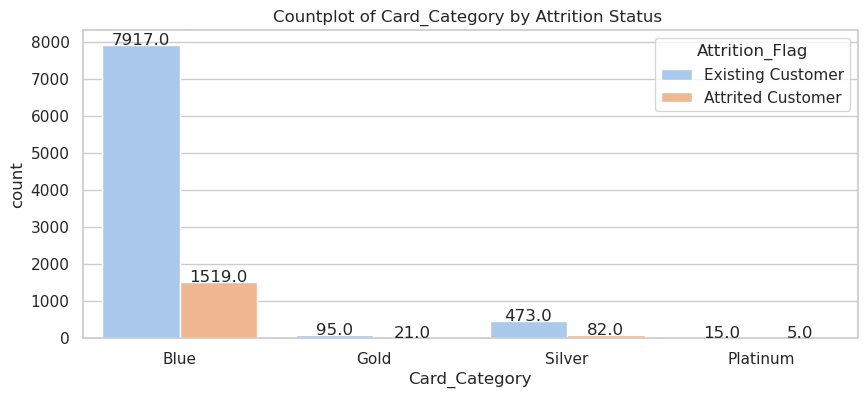

In [137]:
for i in cat_cols:
    plt.figure(figsize=(10, 4))    
    ax = sns.countplot(data=df, x=i, hue="Attrition_Flag")
    plt.title(f"Countplot of {i} by Attrition Status ")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center")
    plt.show()
    

In [138]:
import warnings
warnings.filterwarnings('ignore')

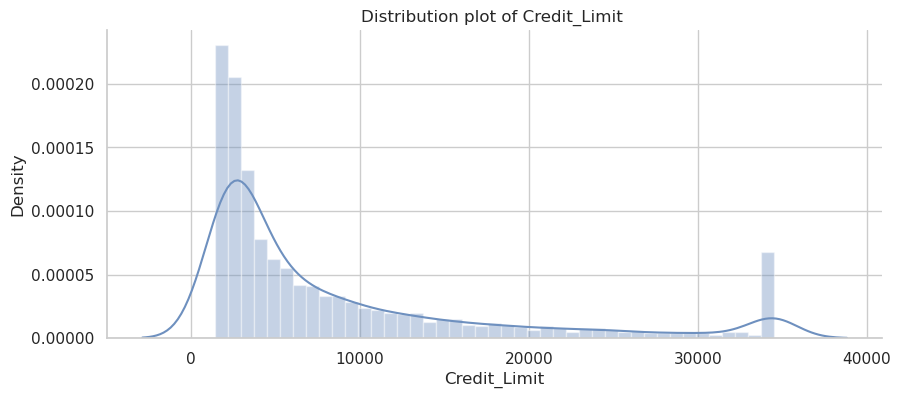

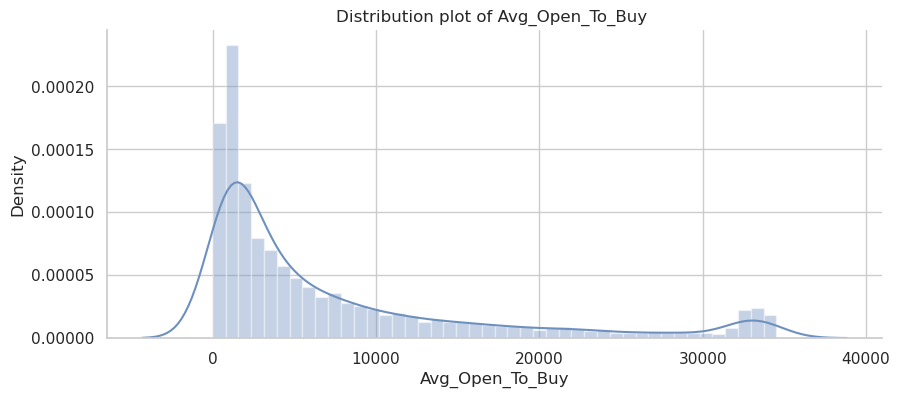

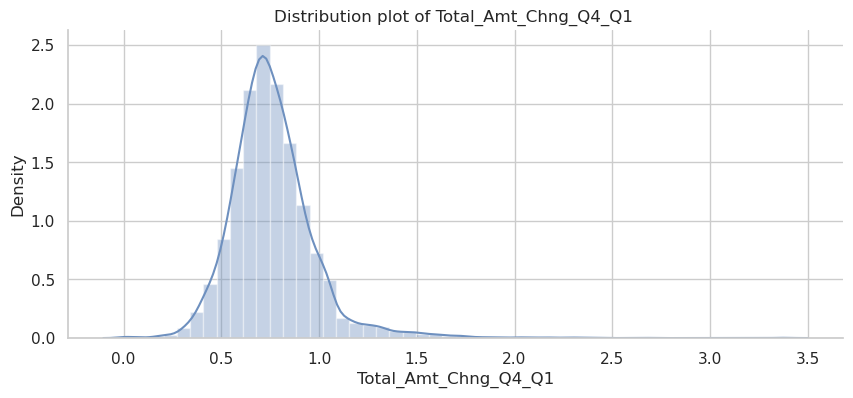

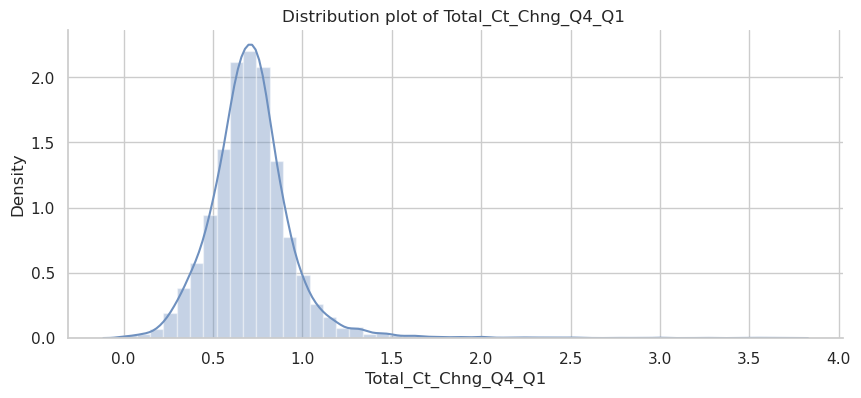

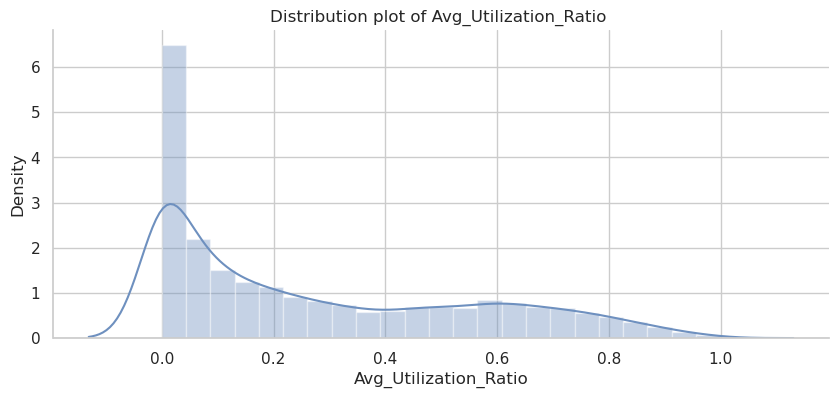

In [141]:
for i in float_cols:
    plt.figure(figsize=(10, 4))
    sns.distplot(df[i])
    plt.title(f"Distribution plot of {i} ")
    sns.despine()
    plt.show()


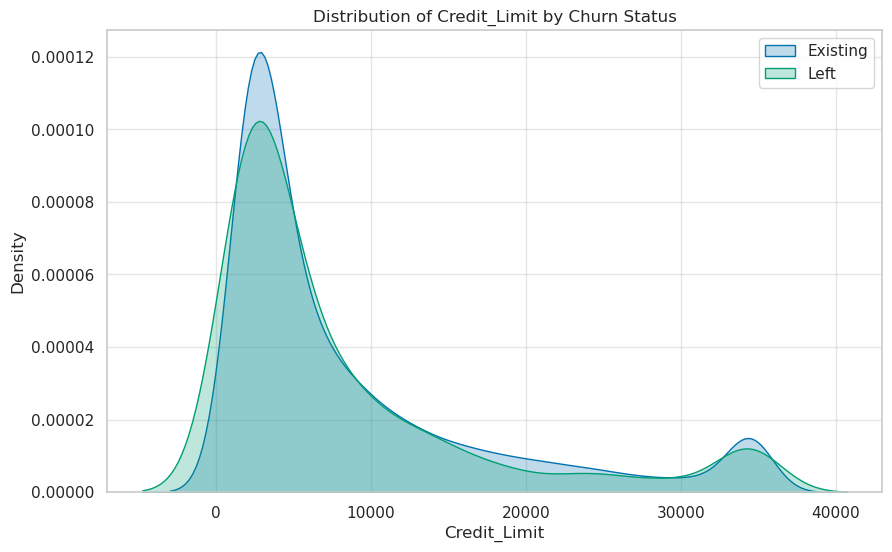

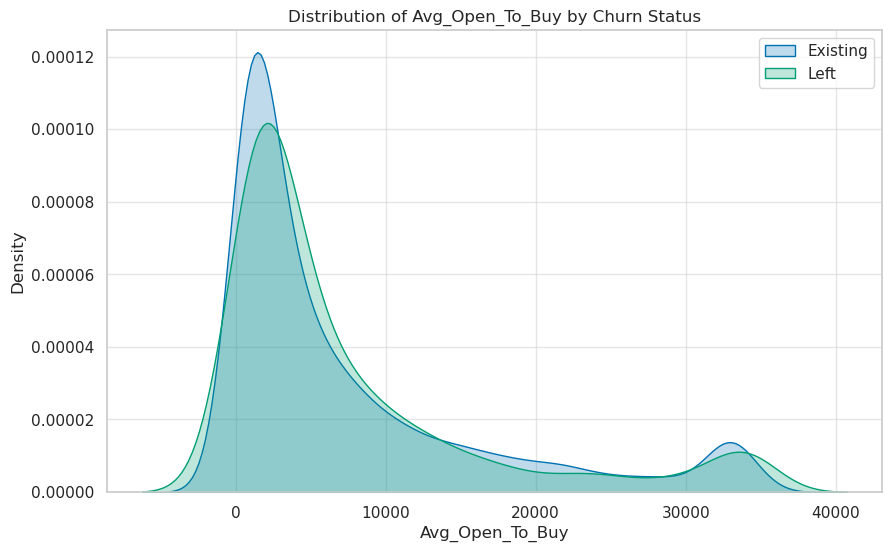

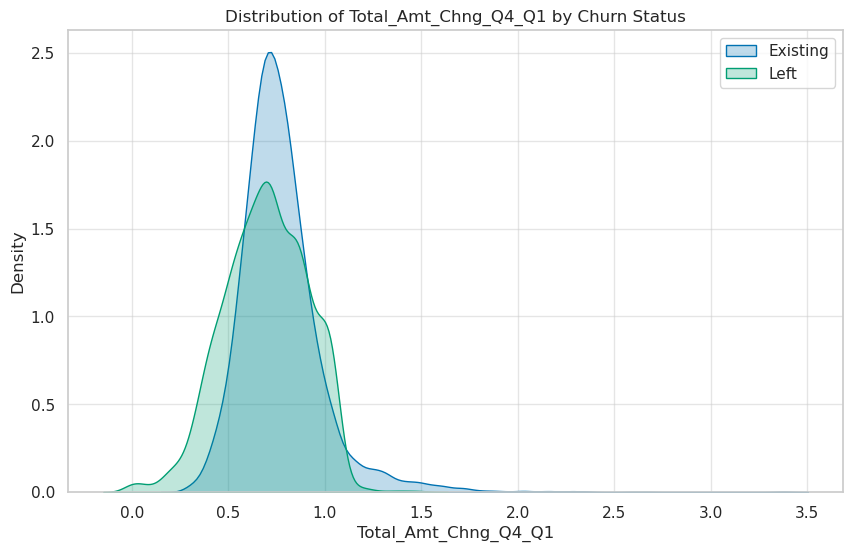

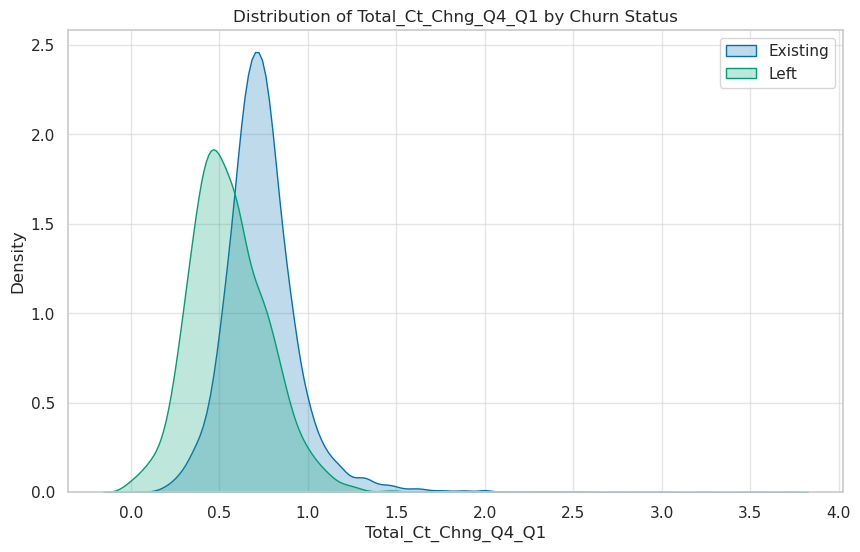

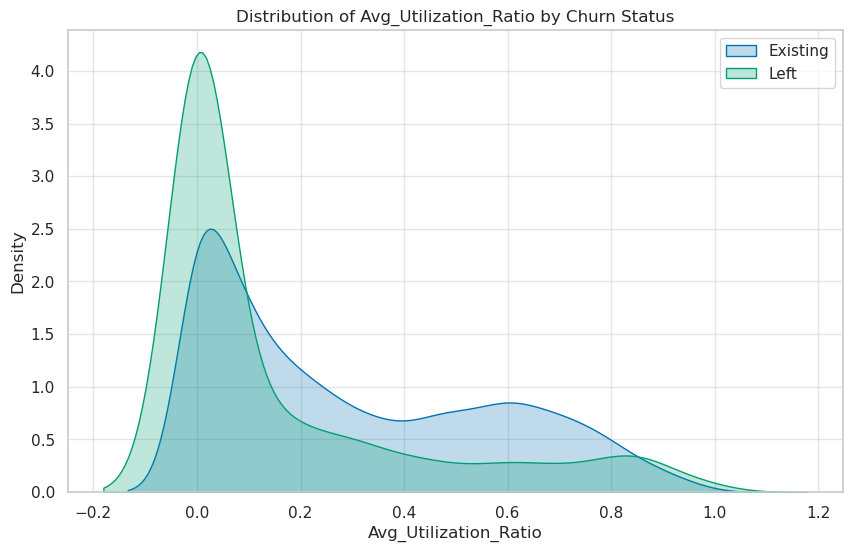

In [142]:
for col in float_cols:
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn-colorblind')
    plt.grid(True, alpha=0.5)
    sns.kdeplot(df.loc[df['Attrition_Flag'] == 'Existing Customer', col], label = 'Existing', shade=True)
    sns.kdeplot(df.loc[df['Attrition_Flag'] =='Attrited Customer', col], label = 'Left', shade=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col + ' by Churn Status')
    plt.legend()
    plt.show()

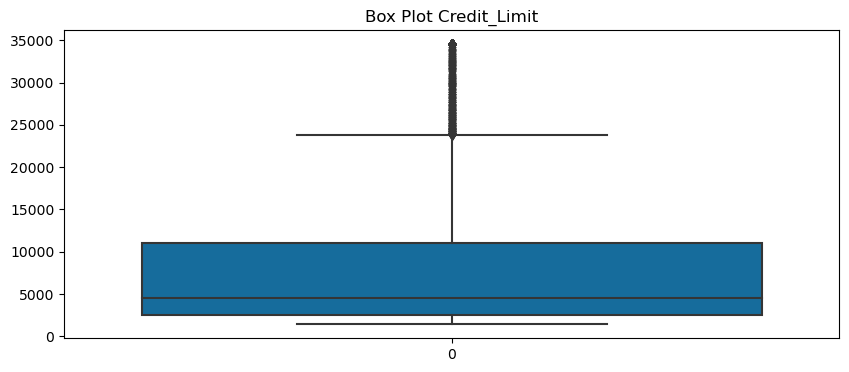

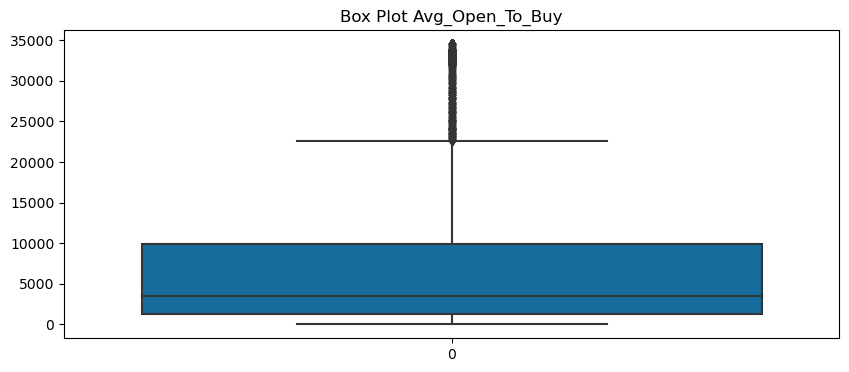

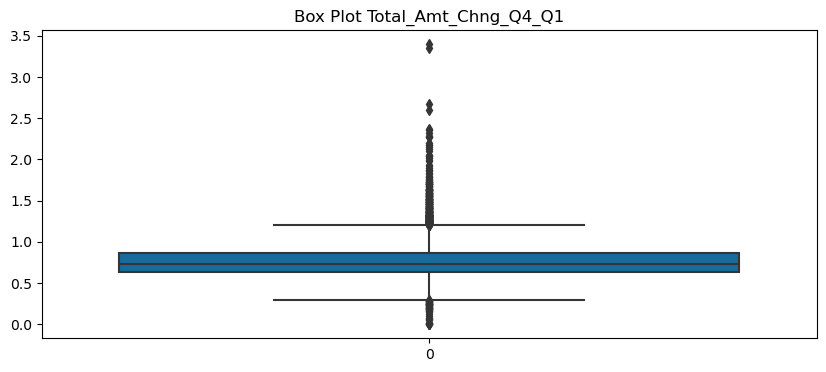

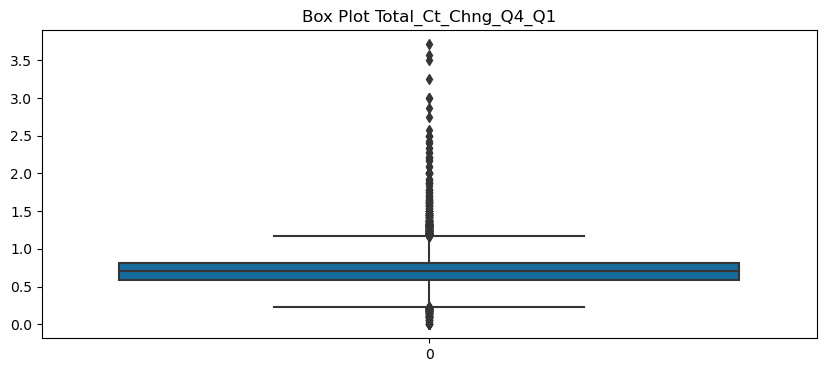

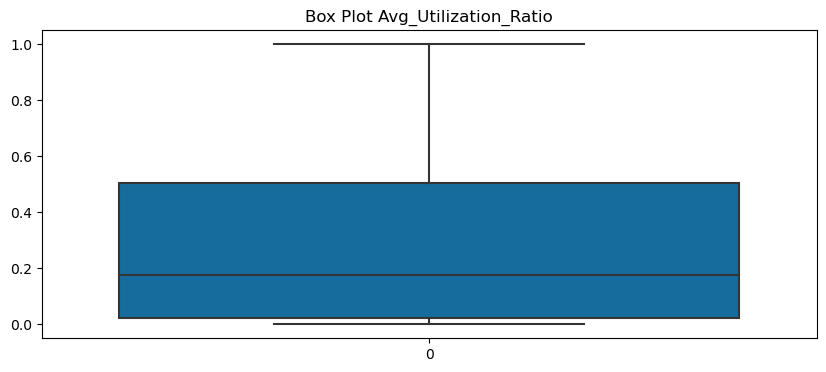

In [173]:
for i in float_cols:
    plt.figure(figsize=(10, 4))
    plt.title(f"Box Plot {i}")
    sns.boxplot(df[i])
    plt.show()


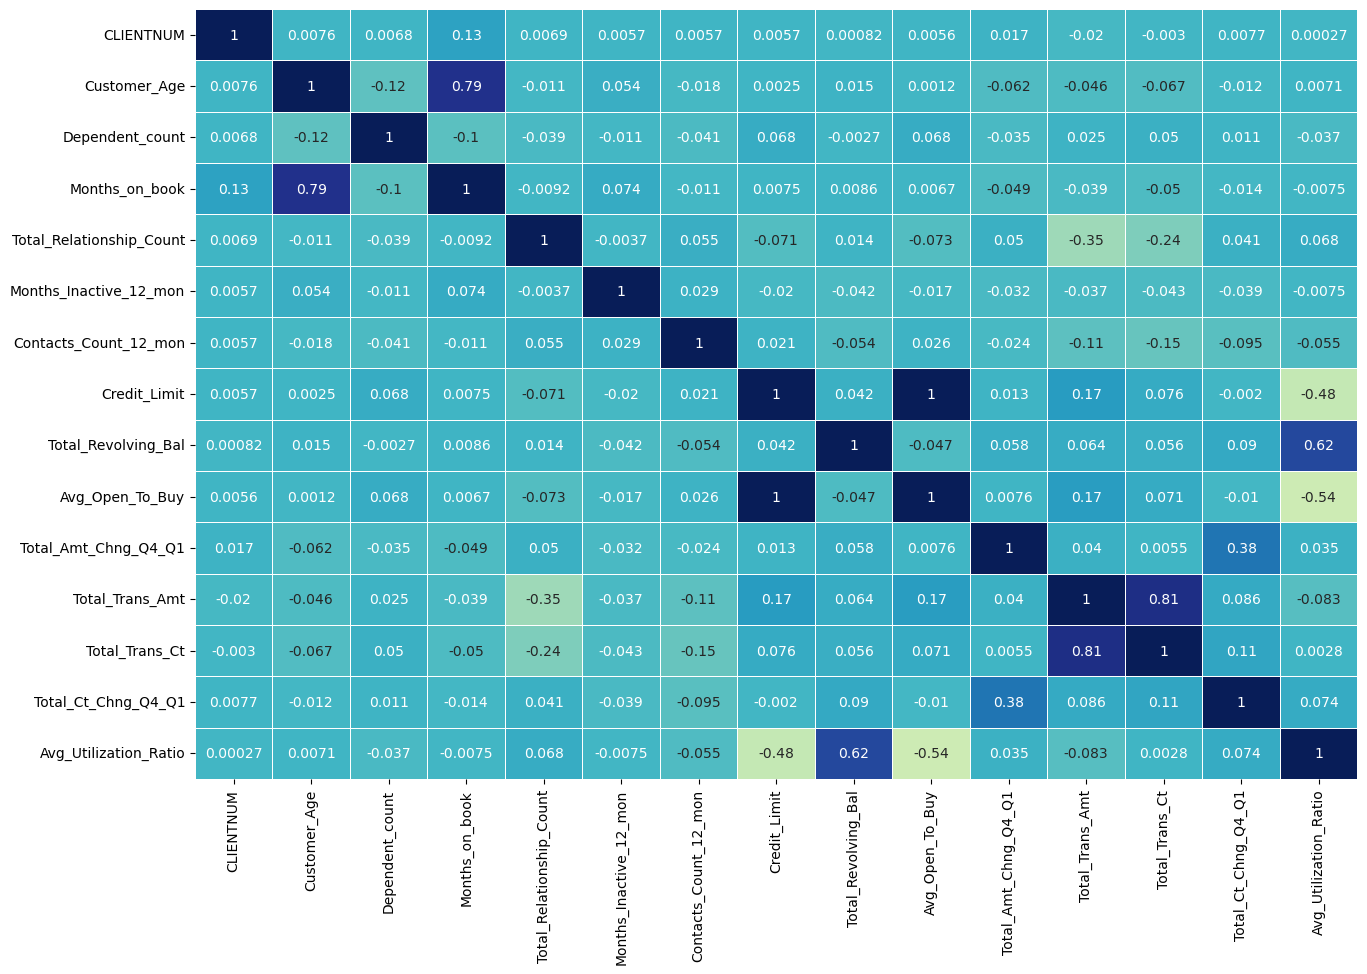

In [195]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


In [143]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

## Data Preprocessing

### Encoding Categorical Variables

In [144]:
cat_cols=[ 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category']

In [145]:
df = pd.get_dummies(df, columns=['Card_Category'])


In [146]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
        df[col] = le.fit_transform(df[col])
        

In [147]:
X=df.drop(columns={'Attrition_Flag', 'CLIENTNUM'})
y=df['Attrition_Flag']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

### Scaling our data

Using RobustScaler as we have quite a few outliers and it is robust to outliers. 

In [149]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


### Oversampling our training set


Due to the class imbalance in customer attrition, we are oversampling.

In [150]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

pd.Series(y_train).value_counts()

0    6799
1    6799
Name: Attrition_Flag, dtype: int64

## Machine Learning Models

### Defining functions to apply to different ML Models

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [62]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=None)

In [63]:
def confmatrix(predict):
    conf_mat = confusion_matrix(y_test, predict)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [64]:
def rocauc(model):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [85]:
model_results = pd.DataFrame(columns=['ML Model Name', 'Accuracy Score', 'ROC-AUC Score', 'Cross-Validation Accuracy Score', 'Cross-Validation F1 Score', 'Cross-Validation Precision Score', 'Cross-Validation Recall Score'])

def evaluate(predict, model, model_name, results_df):
    accuracy = round(accuracy_score(y_test, predict), 2) * 100
    roc_auc = round(roc_auc_score(y_test, predict), 2) * 100
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=1, scoring='accuracy').mean()
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=1, scoring='f1').mean()
    cv_precision = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=1, scoring='precision').mean()
    cv_recall = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=1, scoring='recall').mean()
    metrics_dict = {'ML Model Name': model_name ,
                'Accuracy Score': accuracy,
                'ROC-AUC Score': roc_auc,
                'Cross-Validation Accuracy Score': cv_accuracy,
                'Cross-Validation F1 Score': cv_f1,
                'Cross-Validation Precision Score': cv_precision,
                'Cross-Validation Recall Score': cv_recall}
    results_df = pd.concat([results_df, pd.DataFrame.from_dict(metrics_dict, orient='index').T])
    return results_df


### Logistic Regression

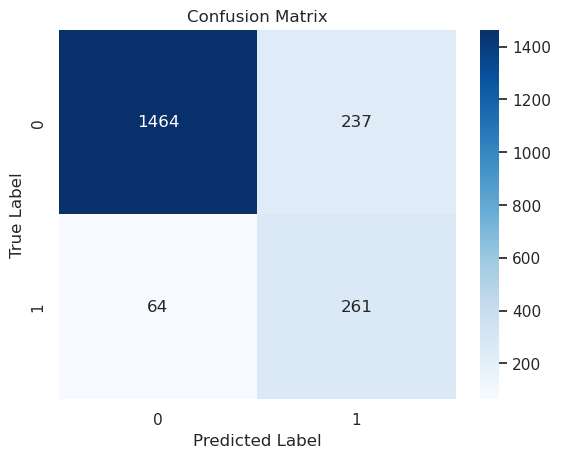

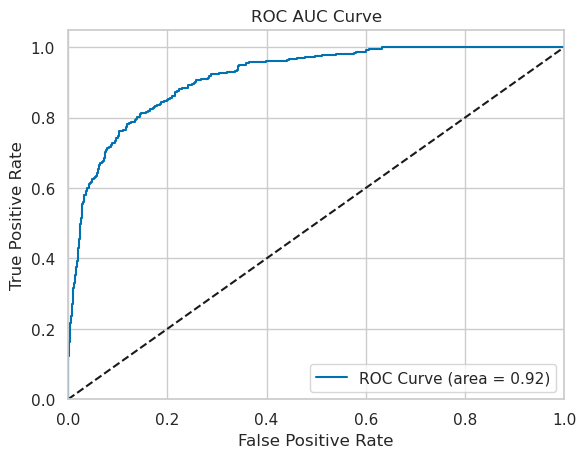

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266


In [86]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
y_pred_log = logmodel.predict(X_test)

confmatrix(y_pred_log)
rocauc(logmodel)
model_results = evaluate(y_pred_log, logmodel, 'Logistic Regression', model_results)
model_results

### Random Forest Classifier

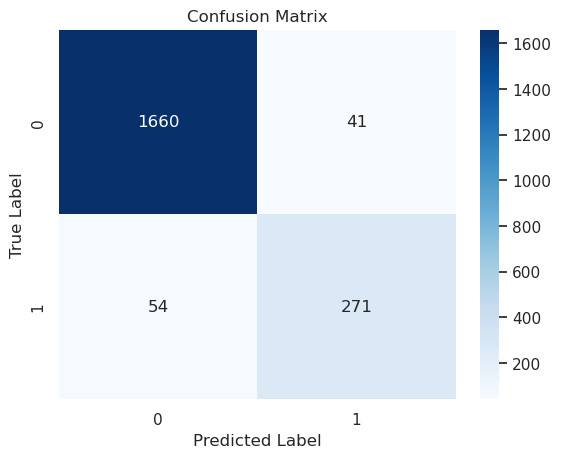

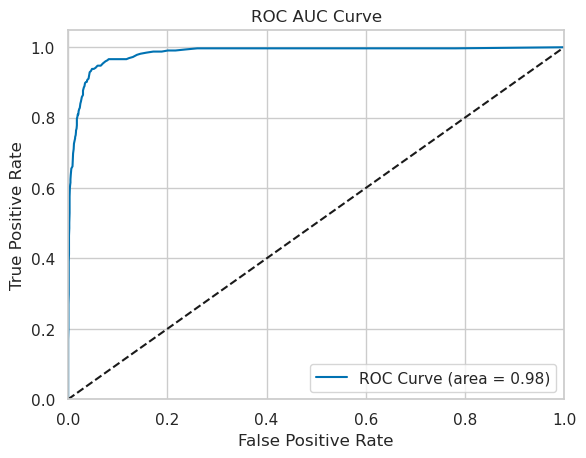

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266
0,Random Forest Classifier,95.0,90.0,0.979926,0.947614,0.925195,0.971261


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
y_pred_rf = rfmodel.predict(X_test)
confmatrix(y_pred_rf)
rocauc(rfmodel)

model_results = evaluate(y_pred_rf,rfmodel,'Random Forest Classifier', model_results)
model_results

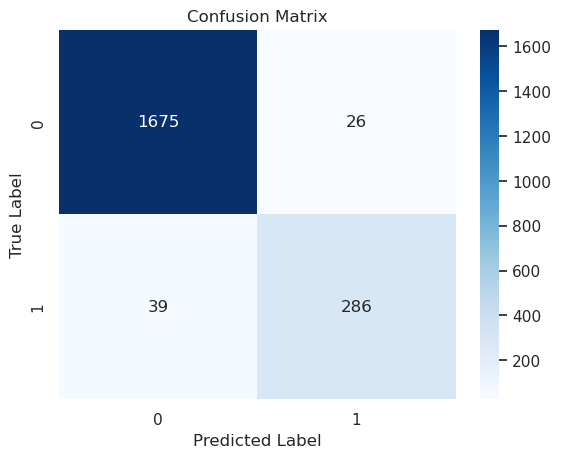

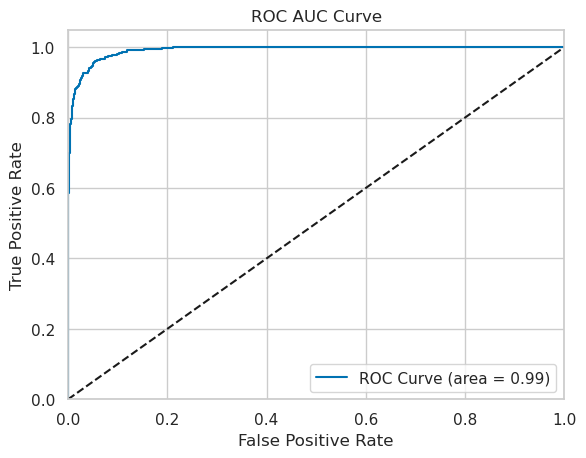

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266
0,Random Forest Classifier,95.0,90.0,0.979926,0.947614,0.925195,0.971261
0,XGB Classifier,97.0,93.0,0.984705,0.957608,0.948508,0.967128


In [88]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_pred_xgb = xgbmodel.predict(X_test)
confmatrix(y_pred_xgb)
rocauc(xgbmodel)
model_results =evaluate(y_pred_xgb,xgbmodel,'XGB Classifier',model_results)
model_results

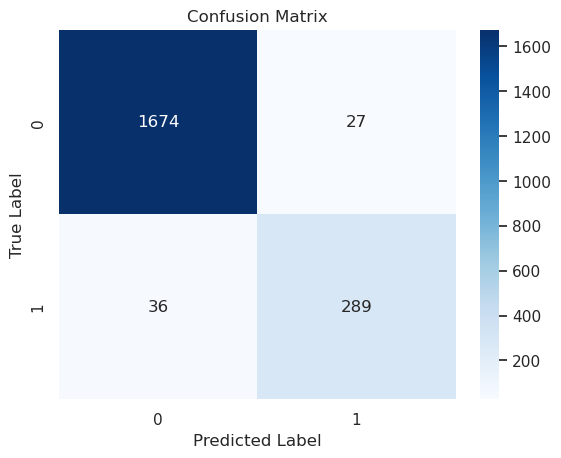

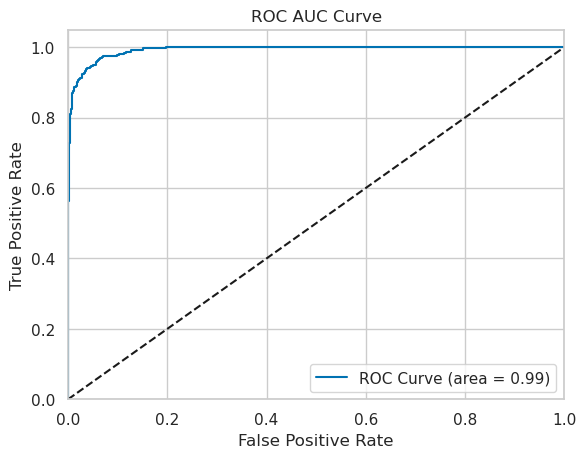

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266
0,Random Forest Classifier,95.0,90.0,0.979926,0.947614,0.925195,0.971261
0,XGB Classifier,97.0,93.0,0.984705,0.957608,0.948508,0.967128
0,LightGBM Classifier,97.0,94.0,0.984044,0.957201,0.947431,0.967485


In [89]:
from lightgbm import LGBMClassifier

lgbmmodel = LGBMClassifier()
lgbmmodel.fit(X_train, y_train)
y_pred_lgbm = lgbmmodel.predict(X_test)

confmatrix(y_pred_lgbm)
rocauc(lgbmmodel)
model_results= evaluate(y_pred_lgbm,lgbmmodel,'LightGBM Classifier',model_results)
model_results

## Hyperparameter Tuning XGB Classifier with Ramdom Grid Search

In [271]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# define the hyperparameter space to search over
param_distributions = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# define the scoring metrics to optimize for
scoring = {'f1': 'f1', 'roc_auc': 'roc_auc'}

# define the XGBClassifier model
model = XGBClassifier(random_state=42)

# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    scoring=scoring,
    refit='f1',
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# print the best hyperparameters found
print('Best hyperparameters:', random_search.best_params_)
print('Best F1 score:', random_search.best_score_)
print('Best ROC-AUC score:', random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_])


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.5, subsample=1.0; total time=  12.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.5, subsample=1.0; total time=  14.9s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.5, subsample=1.0; total time=  14.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.5, subsample=1.0; total time=  14.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.5, subsample=1.0; total time=  14.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_de

In [276]:
params = str({'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.5})
params = params.replace("'", "").replace(": ", "=")
params

'{subsample=0.8, reg_lambda=1.0, reg_alpha=0.5, n_estimators=100, max_depth=9, learning_rate=0.01, colsample_bytree=0.5}'

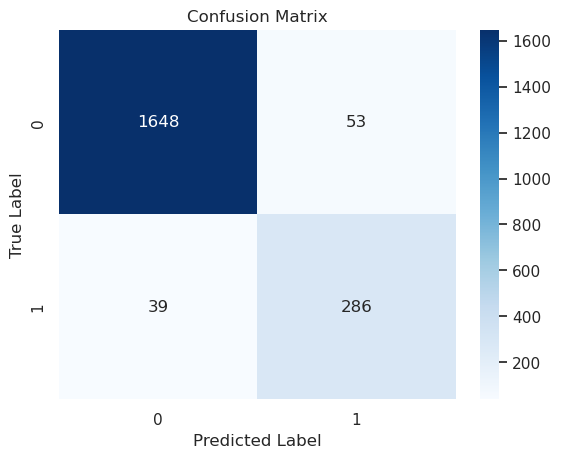

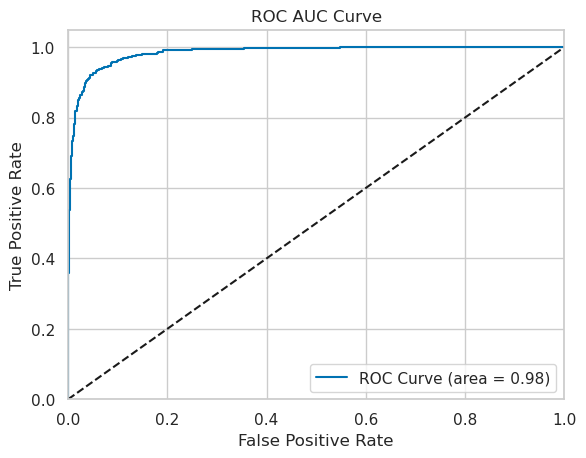

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266
0,Random Forest Classifier,95.0,90.0,0.979926,0.947614,0.925195,0.971261
0,XGB Classifier,97.0,93.0,0.984705,0.957608,0.948508,0.967128
0,LightGBM Classifier,97.0,94.0,0.984044,0.957201,0.947431,0.967485
0,XGB Classifier HyperParameter Tuned,95.0,92.0,0.970881,0.931727,0.904746,0.962813


In [90]:
from xgboost import XGBClassifier

xgbmodel_hyp = XGBClassifier(subsample=0.8, reg_lambda=1.0, reg_alpha=0.5, n_estimators=100, max_depth=9, learning_rate=0.01, colsample_bytree=0.5)
xgbmodel_hyp.fit(X_train, y_train)
y_pred_xgb_hyp = xgbmodel_hyp.predict(X_test)
confmatrix(y_pred_xgb_hyp)
rocauc(xgbmodel_hyp)
model_results= evaluate(y_pred_xgb_hyp,xgbmodel_hyp,'XGB Classifier HyperParameter Tuned',model_results)
model_results

## Hyperparameter Tuning LGBM Classifier with Ramdom Grid Search

In [84]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer

param_distributions = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127]}

# define evaluation metrics
scoring = {
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)}

# create an LGBMClassifier
lgbm = LGBMClassifier()

# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    lgbm, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring=scoring, 
    refit='f1',
    random_state=42
)

# fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters and scores
print(f"Best score (f1): {random_search.best_score_:.3f}")
print(f"Best score (roc_auc): {random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_]:.3f}")
print(f"Best hyperparameters: {random_search.best_params_}")

Best score (f1): 0.975
Best score (roc_auc): 0.976
Best hyperparameters: {'num_leaves': 63, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1}


In [91]:
params = str({'num_leaves': 63, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1})
params = params.replace("'", "").replace(": ", "=")
params

'{num_leaves=63, n_estimators=100, max_depth=11, learning_rate=0.1}'

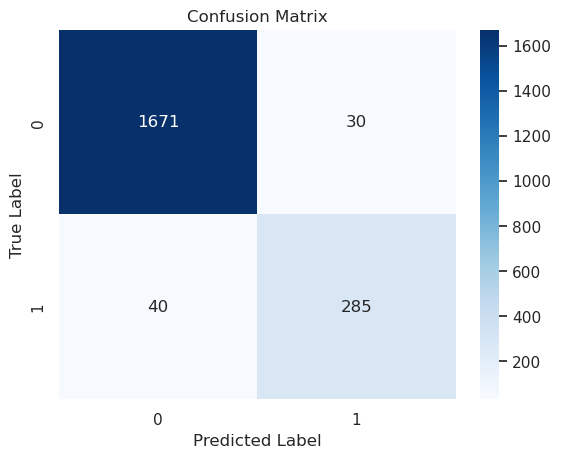

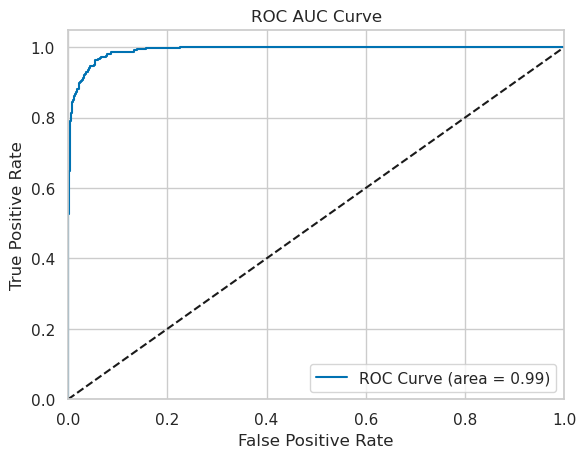

,ML Model Name,Accuracy Score,ROC-AUC Score,Cross-Validation Accuracy Score,Cross-Validation F1 Score,Cross-Validation Precision Score,Cross-Validation Recall Score
0,Logistic Regression,85.0,83.0,0.844831,0.75285,0.707543,0.856266
0,Random Forest Classifier,95.0,90.0,0.979926,0.947614,0.925195,0.971261
0,XGB Classifier,97.0,93.0,0.984705,0.957608,0.948508,0.967128
0,LightGBM Classifier,97.0,94.0,0.984044,0.957201,0.947431,0.967485
0,XGB Classifier HyperParameter Tuned,95.0,92.0,0.970881,0.931727,0.904746,0.962813
0,LightGBM Classifier HyperParameter Tuned,97.0,93.0,0.984411,0.958153,0.947648,0.969252


In [93]:
lgbmmodel_hyp = LGBMClassifier(num_leaves=63, n_estimators=100, max_depth=11, learning_rate=0.1)
lgbmmodel_hyp.fit(X_train, y_train)
y_pred_lgbm_hyp = lgbmmodel_hyp.predict(X_test)

confmatrix(y_pred_lgbm_hyp)
rocauc(lgbmmodel_hyp)
model_results= evaluate(y_pred_lgbm_hyp,lgbmmodel_hyp,'LightGBM Classifier HyperParameter Tuned',model_results)
model_results

In [103]:
model_results.columns

Index(['ML Model Name', 'Accuracy Score', 'ROC-AUC Score',
       'Cross-Validation Accuracy Score', 'Cross-Validation F1 Score',
       'Cross-Validation Precision Score', 'Cross-Validation Recall Score'],
      dtype='object')

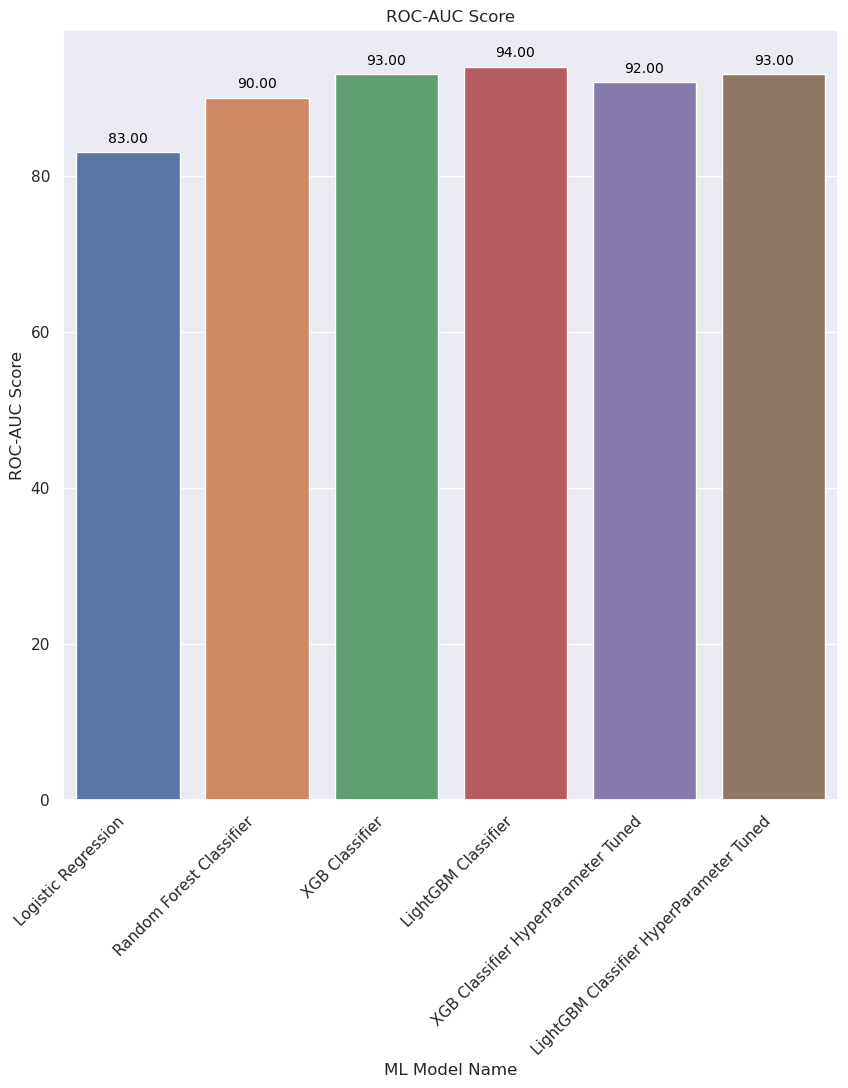

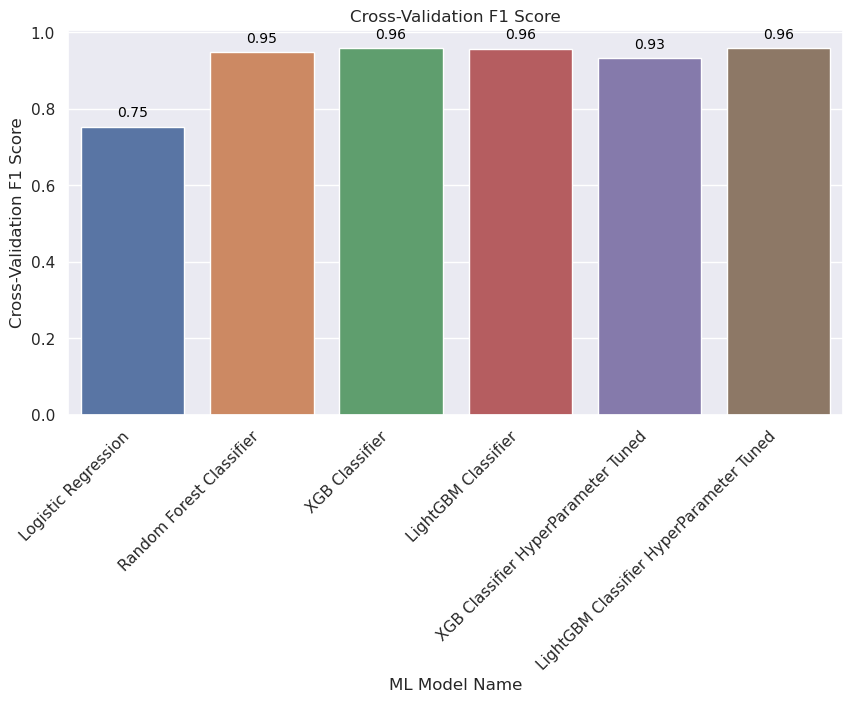

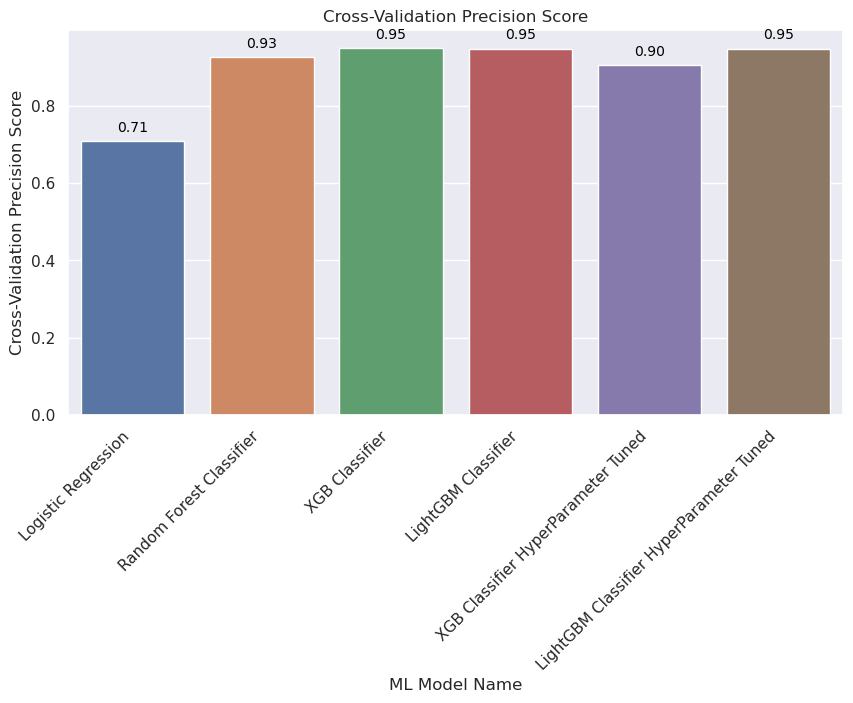

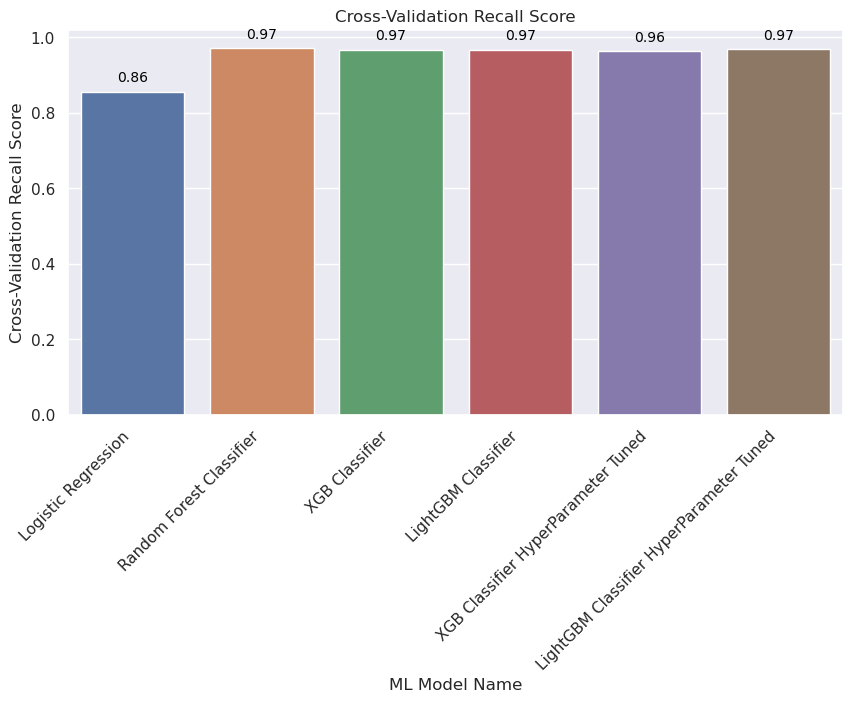

In [116]:
eval_list = ['ROC-AUC Score', 'Cross-Validation F1 Score', 'Cross-Validation Precision Score', 'Cross-Validation Recall Score']

for score in eval_list:
    ax = sns.barplot(x='ML Model Name', y=score, data=model_results)
    ax.set_xticklabels(model_results['ML Model Name'], rotation=45, ha='right')
    sns.set(rc={'figure.figsize':(10,5)})
    plt.title(score)
    plt.xlabel('ML Model Name')
    plt.ylabel(score)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
    plt.show()

## Plotting Features Importance in Customer Attrition

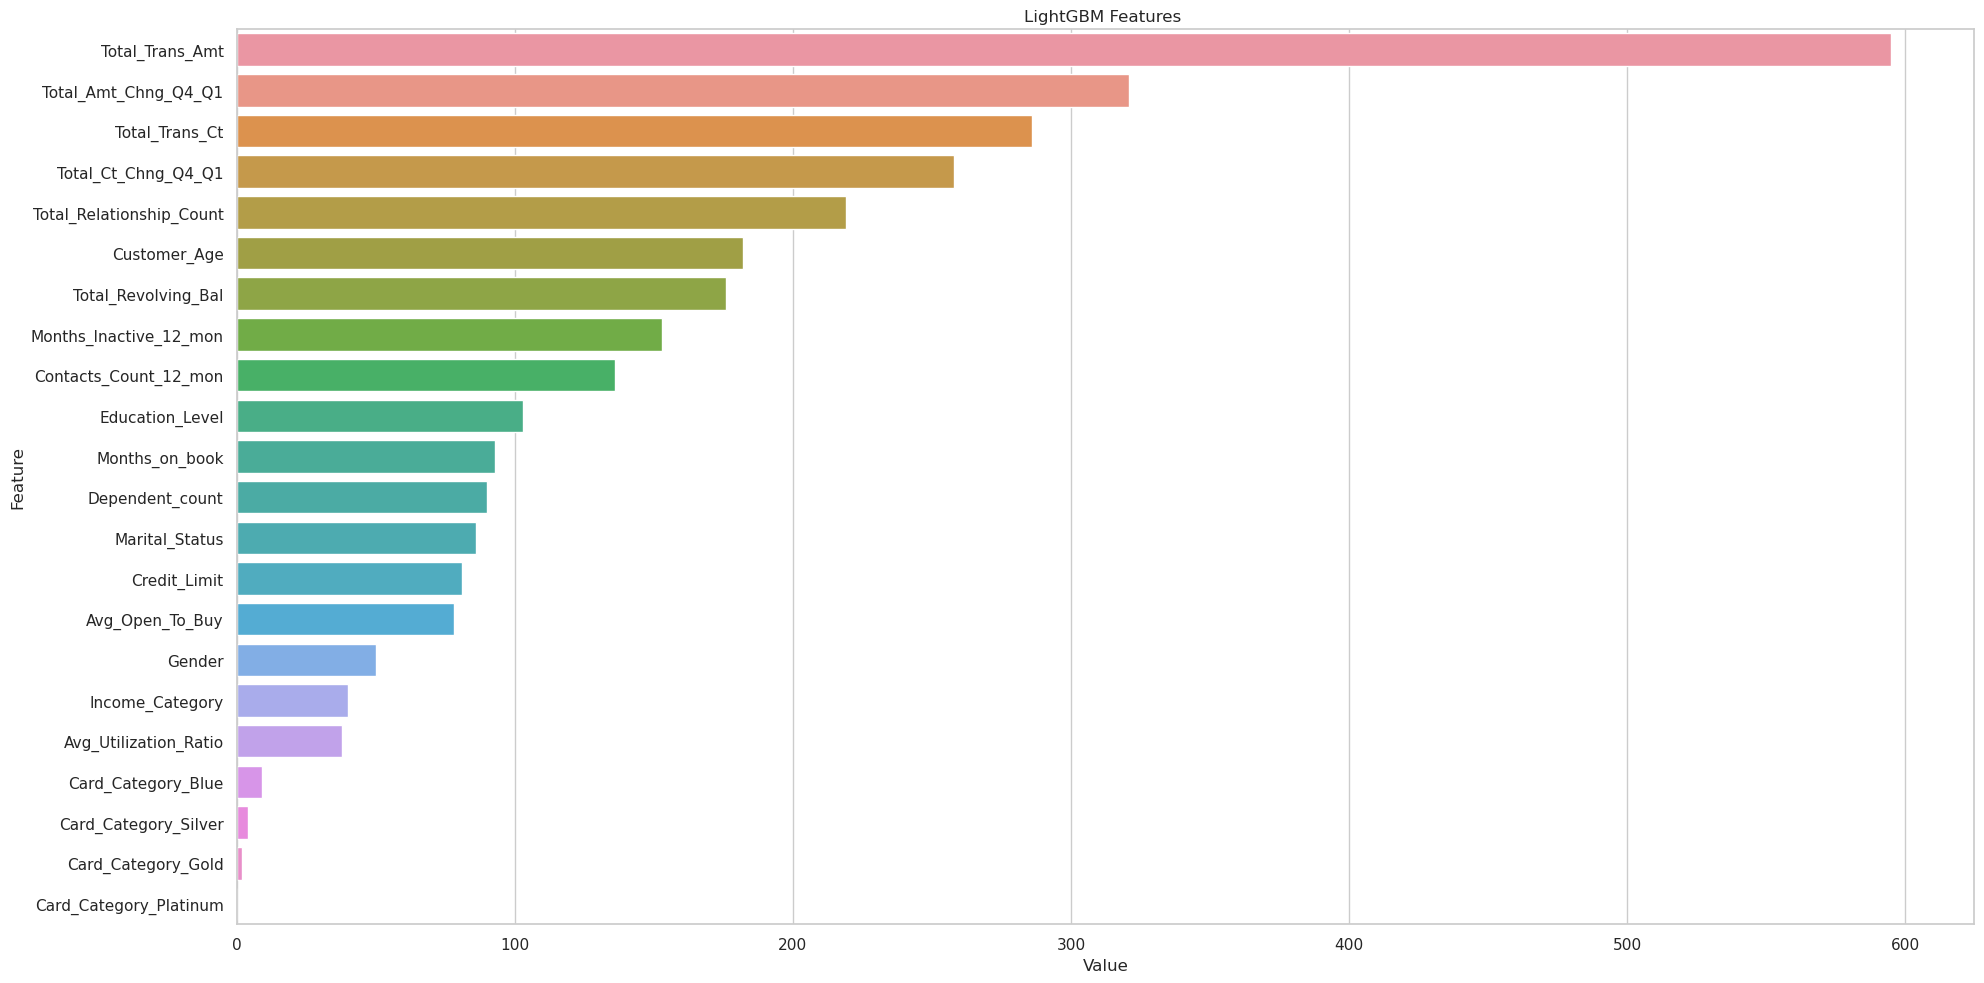

In [151]:
import lightgbm as lgb

feature_imp = pd.DataFrame(sorted(zip(lgbmmodel.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features ')
plt.tight_layout()
plt.show()


In [152]:
import joblib

joblib.dump(lgbmmodel,'churn_predict')

model = joblib.load('churn_predict')